In [20]:

list.of.packages <- c("ggplot2",
                        "reshape2",
                        "GGally",
                        "ggridges",
                        "plyr",
                        "dplyr",
                        "tidyr",
                        "Cairo",
                        "matrixStats",
                        "forcats",
                        "hardhat",
                        "grid",
                        "gridExtra",
                        "egg",
                        "stringr",
                        "cowplot",
                        "ggpubr",
                     "gggenes")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)


library(reshape2)
library(ggplot2)

library(GGally)
library(ggridges)
library(plyr)
library(dplyr)
library(tidyr)
library(Cairo)
library(matrixStats)
library(forcats)
library(hardhat)
library(grid)
library(gridExtra)
library(egg)
library(stringr)
library(cowplot)
library(ggpubr)
library(gggenes)
options(repr.plot.width = 25, repr.plot.height = 20, repr.plot.res = 100)





In [21]:
domain_data = read.csv("HRR_domain_info_for_gggene.csv")
subdomain_data = read.csv("HRR_subdomain_info_for_gggene.csv")


In [22]:
domain_data

HRR25_start,HRR25_end,MSA_start,MSA_end,molecule,domain,subdomain,color
<int>,<int>,<int>,<int>,<chr>,<chr>,<lgl>,<chr>
9,278,12,288,HRR25,Kinase,NA,#E69F00
394,494,503,777,HRR25,PQ-rich,NA,#ababab
290,394,300,503,HRR25,Central,NA,#56B4E9


In [23]:
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

In [24]:
group.colors = c("Kinase" = "#D55E00","PQ-rich" = "#56B4E9","Central" = "#E69F00")


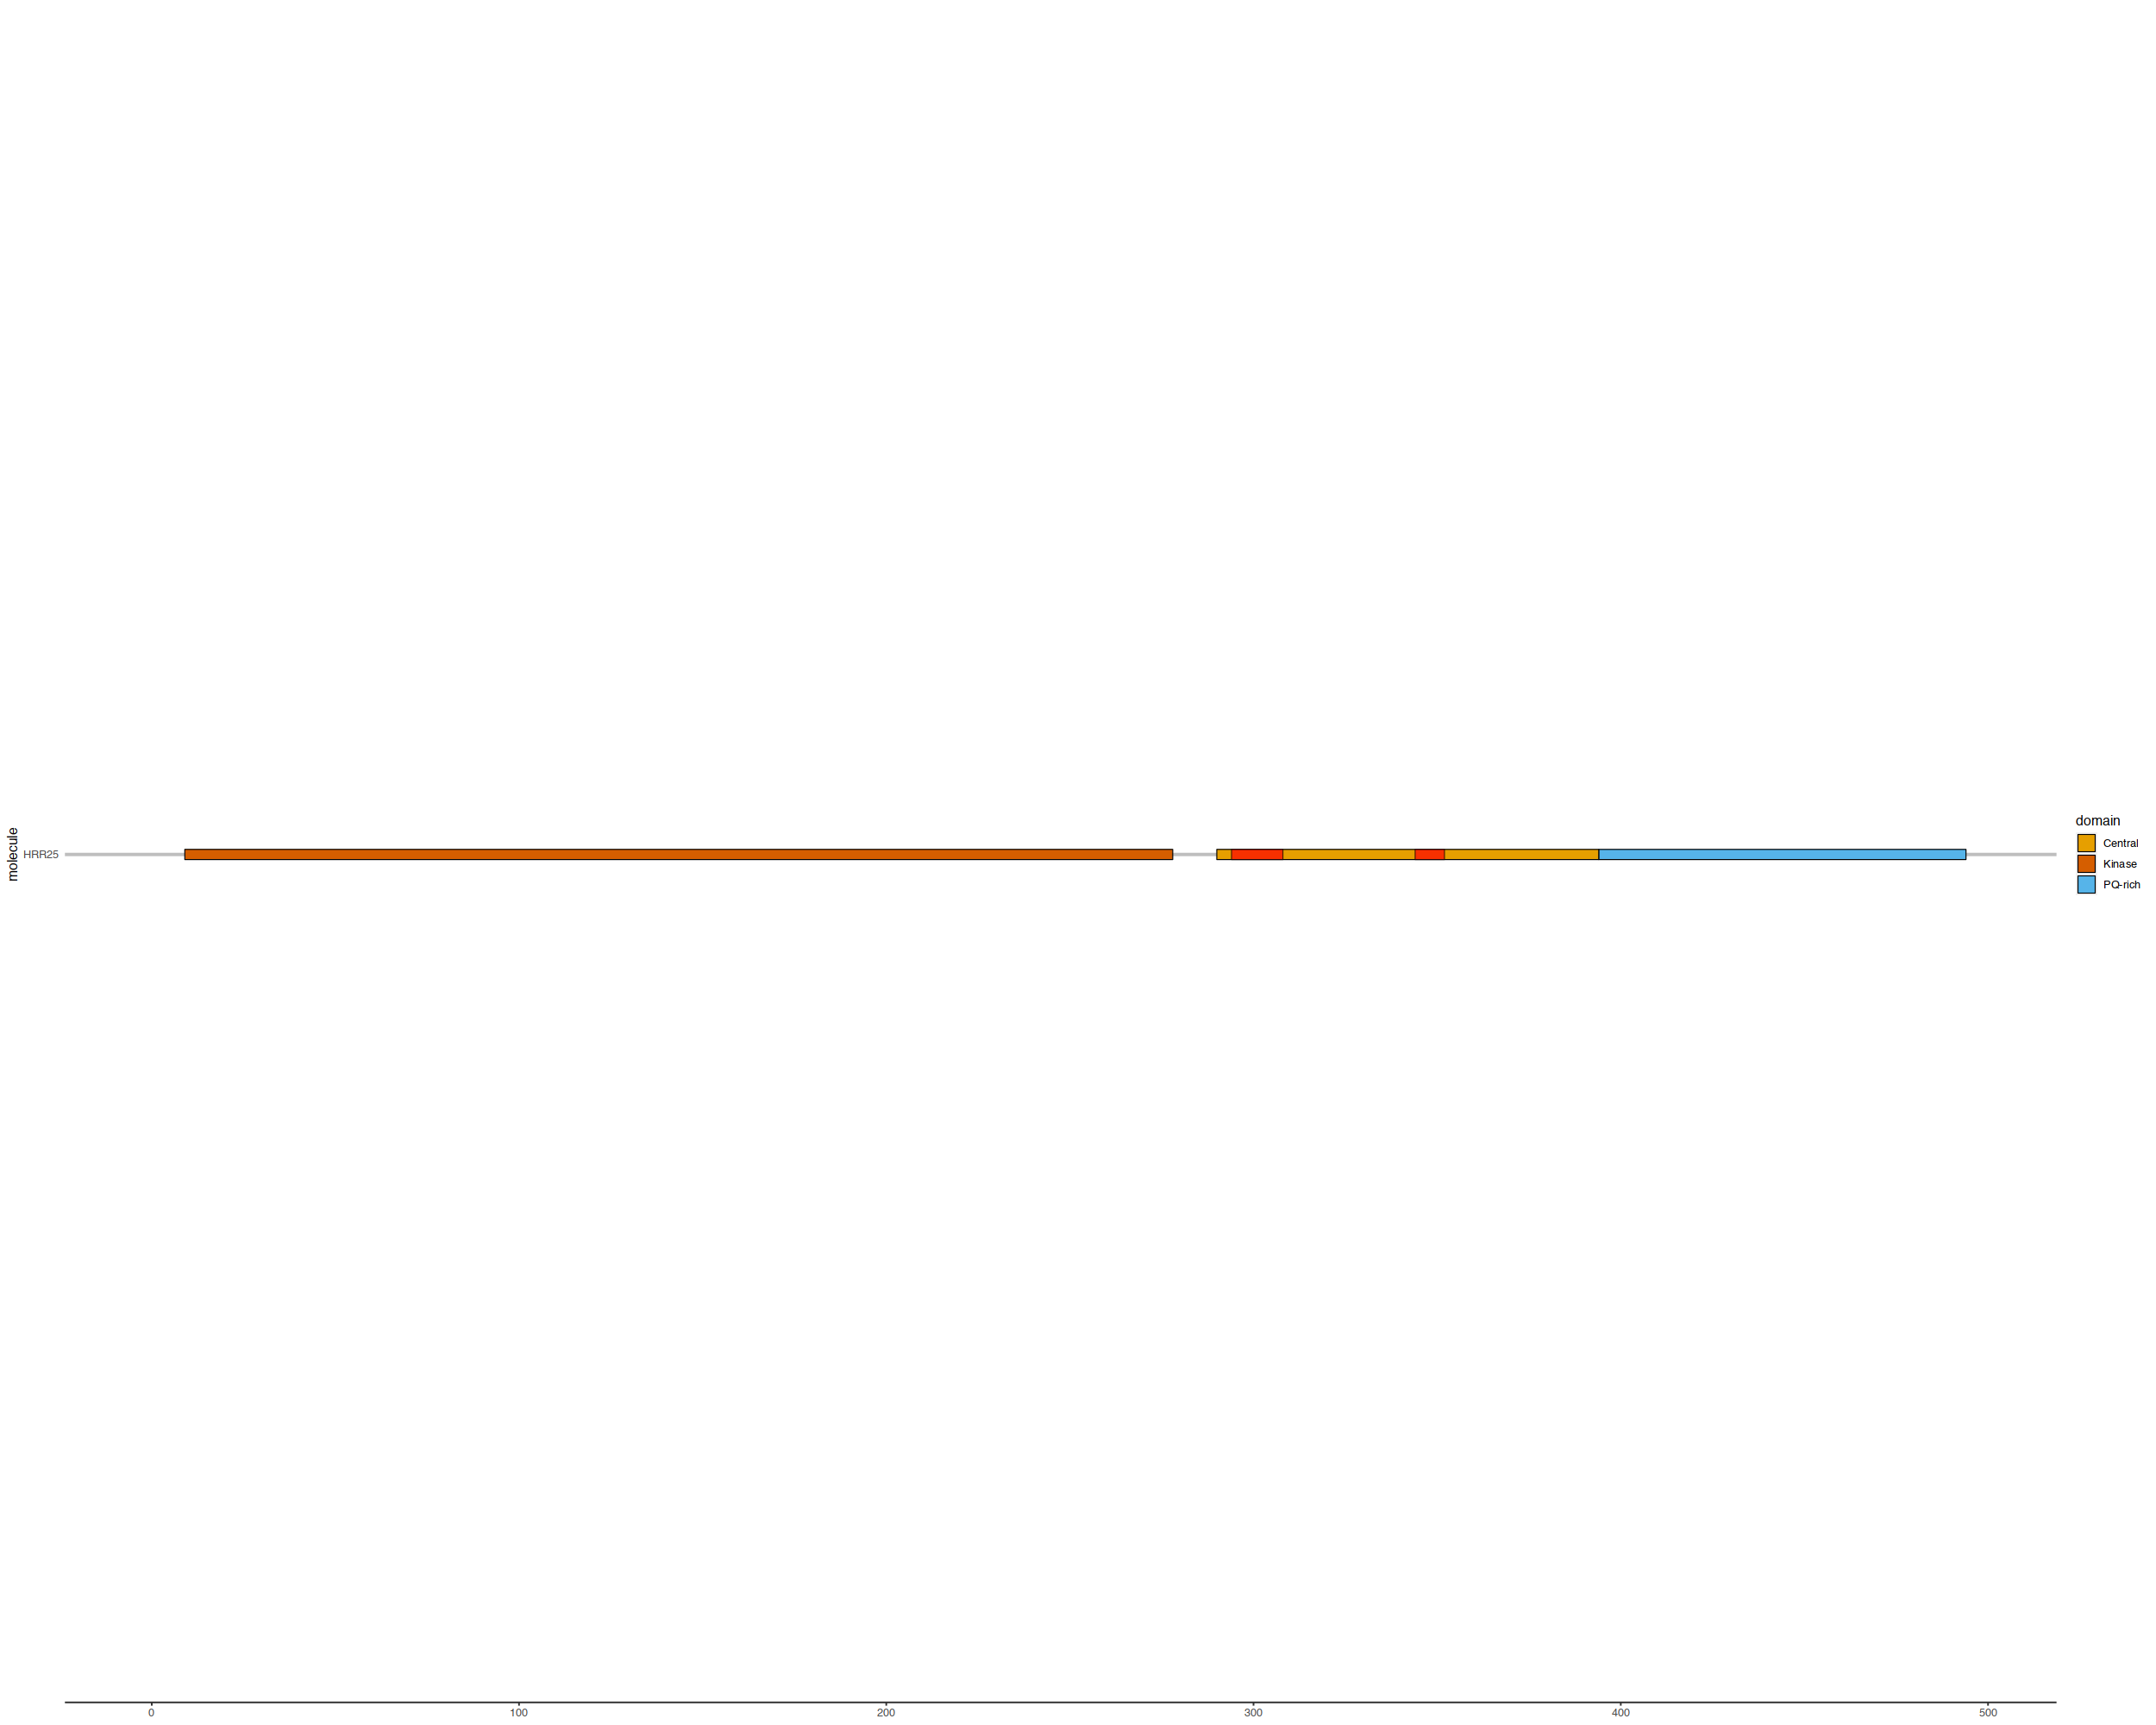

In [25]:
ggplot(domain_data, aes(xmin = HRR25_start, xmax = HRR25_end, y = molecule, fill = domain)) +
  geom_gene_arrow(arrowhead_height = unit(0, "mm"), arrowhead_width = unit(0, "mm")) +
  scale_fill_manual(values=group.colors)+theme_genes()+
  geom_subgene_arrow(data = subdomain_data,arrowhead_height = unit(0, "mm"), arrowhead_width = unit(0, "mm"),
    aes(xmin = HRR25_start, xmax = HRR25_end, y = 1, fill = subdomain,
        xsubmin = HRR25_start, xsubmax = HRR25_end), fill="#FF0000", alpha=.7) +
scale_x_continuous(limits=c(1,494))
  #theme_genes()

In [26]:
ggsave("./output/HRR25_domain_structure.pdf")

Saving 7 x 7 in image


In [27]:
MSA_HRR = read.csv("./meta_data/MSApos2HRR25_ref_Scer.csv")

In [28]:
hrr25_msa = MSA_HRR[MSA_HRR$Scer_HRR25 ==1, ]

In [29]:
pos_max = max(hrr25_msa$MSA_pos)

In [110]:
domain_structures = ggplot() +
geom_gene_arrow(data=hrr25_msa , aes(xmin = MSA_pos, xmax =  MSA_pos, y = "S.cer HRR25", fill = "#000000"),arrowhead_height = unit(0, "mm"), arrowhead_width = unit(0, "mm")) +
  geom_gene_arrow(data=domain_data, aes(xmin = MSA_start, xmax = MSA_end, y = "Domains", fill = domain),arrowhead_height = unit(0, "mm"), arrowhead_width = unit(0, "mm")) +
  scale_fill_manual(values=group.colors)+theme_genes()+
  geom_subgene_arrow(data = subdomain_data,arrowhead_height = unit(0, "mm"),y = "Domains" ,arrowhead_width = unit(0, "mm"),
    aes(xmin = MSA_start, xmax = MSA_end, y = 1, fill = subdomain,
        xsubmin = MSA_start, xsubmax = MSA_end), fill="#FF0000", alpha=.7) #+
  #theme_genes()

In [33]:
ggsave("./output/HRR25_domain_structure_MSA_pos.pdf")

Saving 7 x 7 in image


In [116]:

data =read.csv("./output/2023-08-06_HRR25_protein_alignment_parsed_ref_Tdel_dup.csv")
#head(data)
data$Seq = NULL

In [117]:
data = data%>% select(!contains("."))


In [118]:
head(data)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X889,X890,X891,X892,X893,X894,X895,X896,X897,X898
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,HRR25_01.1,100,100,100,100,100,100,100,100,100,⋯,100,100,100,100,100,100,100,100,100,100
2,HRR25_01.2,100,100,100,100,100,100,100,100,100,⋯,100,100,100,100,100,100,100,100,100,100
3,HRR25_02.1,100,100,100,100,100,100,100,100,100,⋯,100,100,100,100,100,100,100,100,100,100
4,HRR25_02.2,100,100,100,100,100,100,100,100,100,⋯,100,100,100,100,100,100,100,100,100,100
5,HRR25_03.1,100,100,100,100,100,100,100,100,100,⋯,100,100,100,100,100,100,100,100,100,100
6,HRR25_03.2,100,100,100,100,100,100,100,100,100,⋯,100,100,100,100,100,100,100,100,100,100


In [119]:
data_l = melt(data,id.vars = c("ID"))


In [120]:
data_l$ID = as.factor(data_l$ID)

In [121]:
head(data_l)

,ID,variable,value
,<fct>,<fct>,<dbl>
1,HRR25_01.1,X1,100
2,HRR25_01.2,X1,100
3,HRR25_02.1,X1,100
4,HRR25_02.2,X1,100
5,HRR25_03.1,X1,100
6,HRR25_03.2,X1,100


In [122]:
data_l$pos = as.numeric(substr(data_l$variable,2,4))
head(data_l)

max_pos = max(data_l$pos)

,ID,variable,value,pos
,<fct>,<fct>,<dbl>,<dbl>
1,HRR25_01.1,X1,100,1
2,HRR25_01.2,X1,100,1
3,HRR25_02.1,X1,100,1
4,HRR25_02.2,X1,100,1
5,HRR25_03.1,X1,100,1
6,HRR25_03.2,X1,100,1


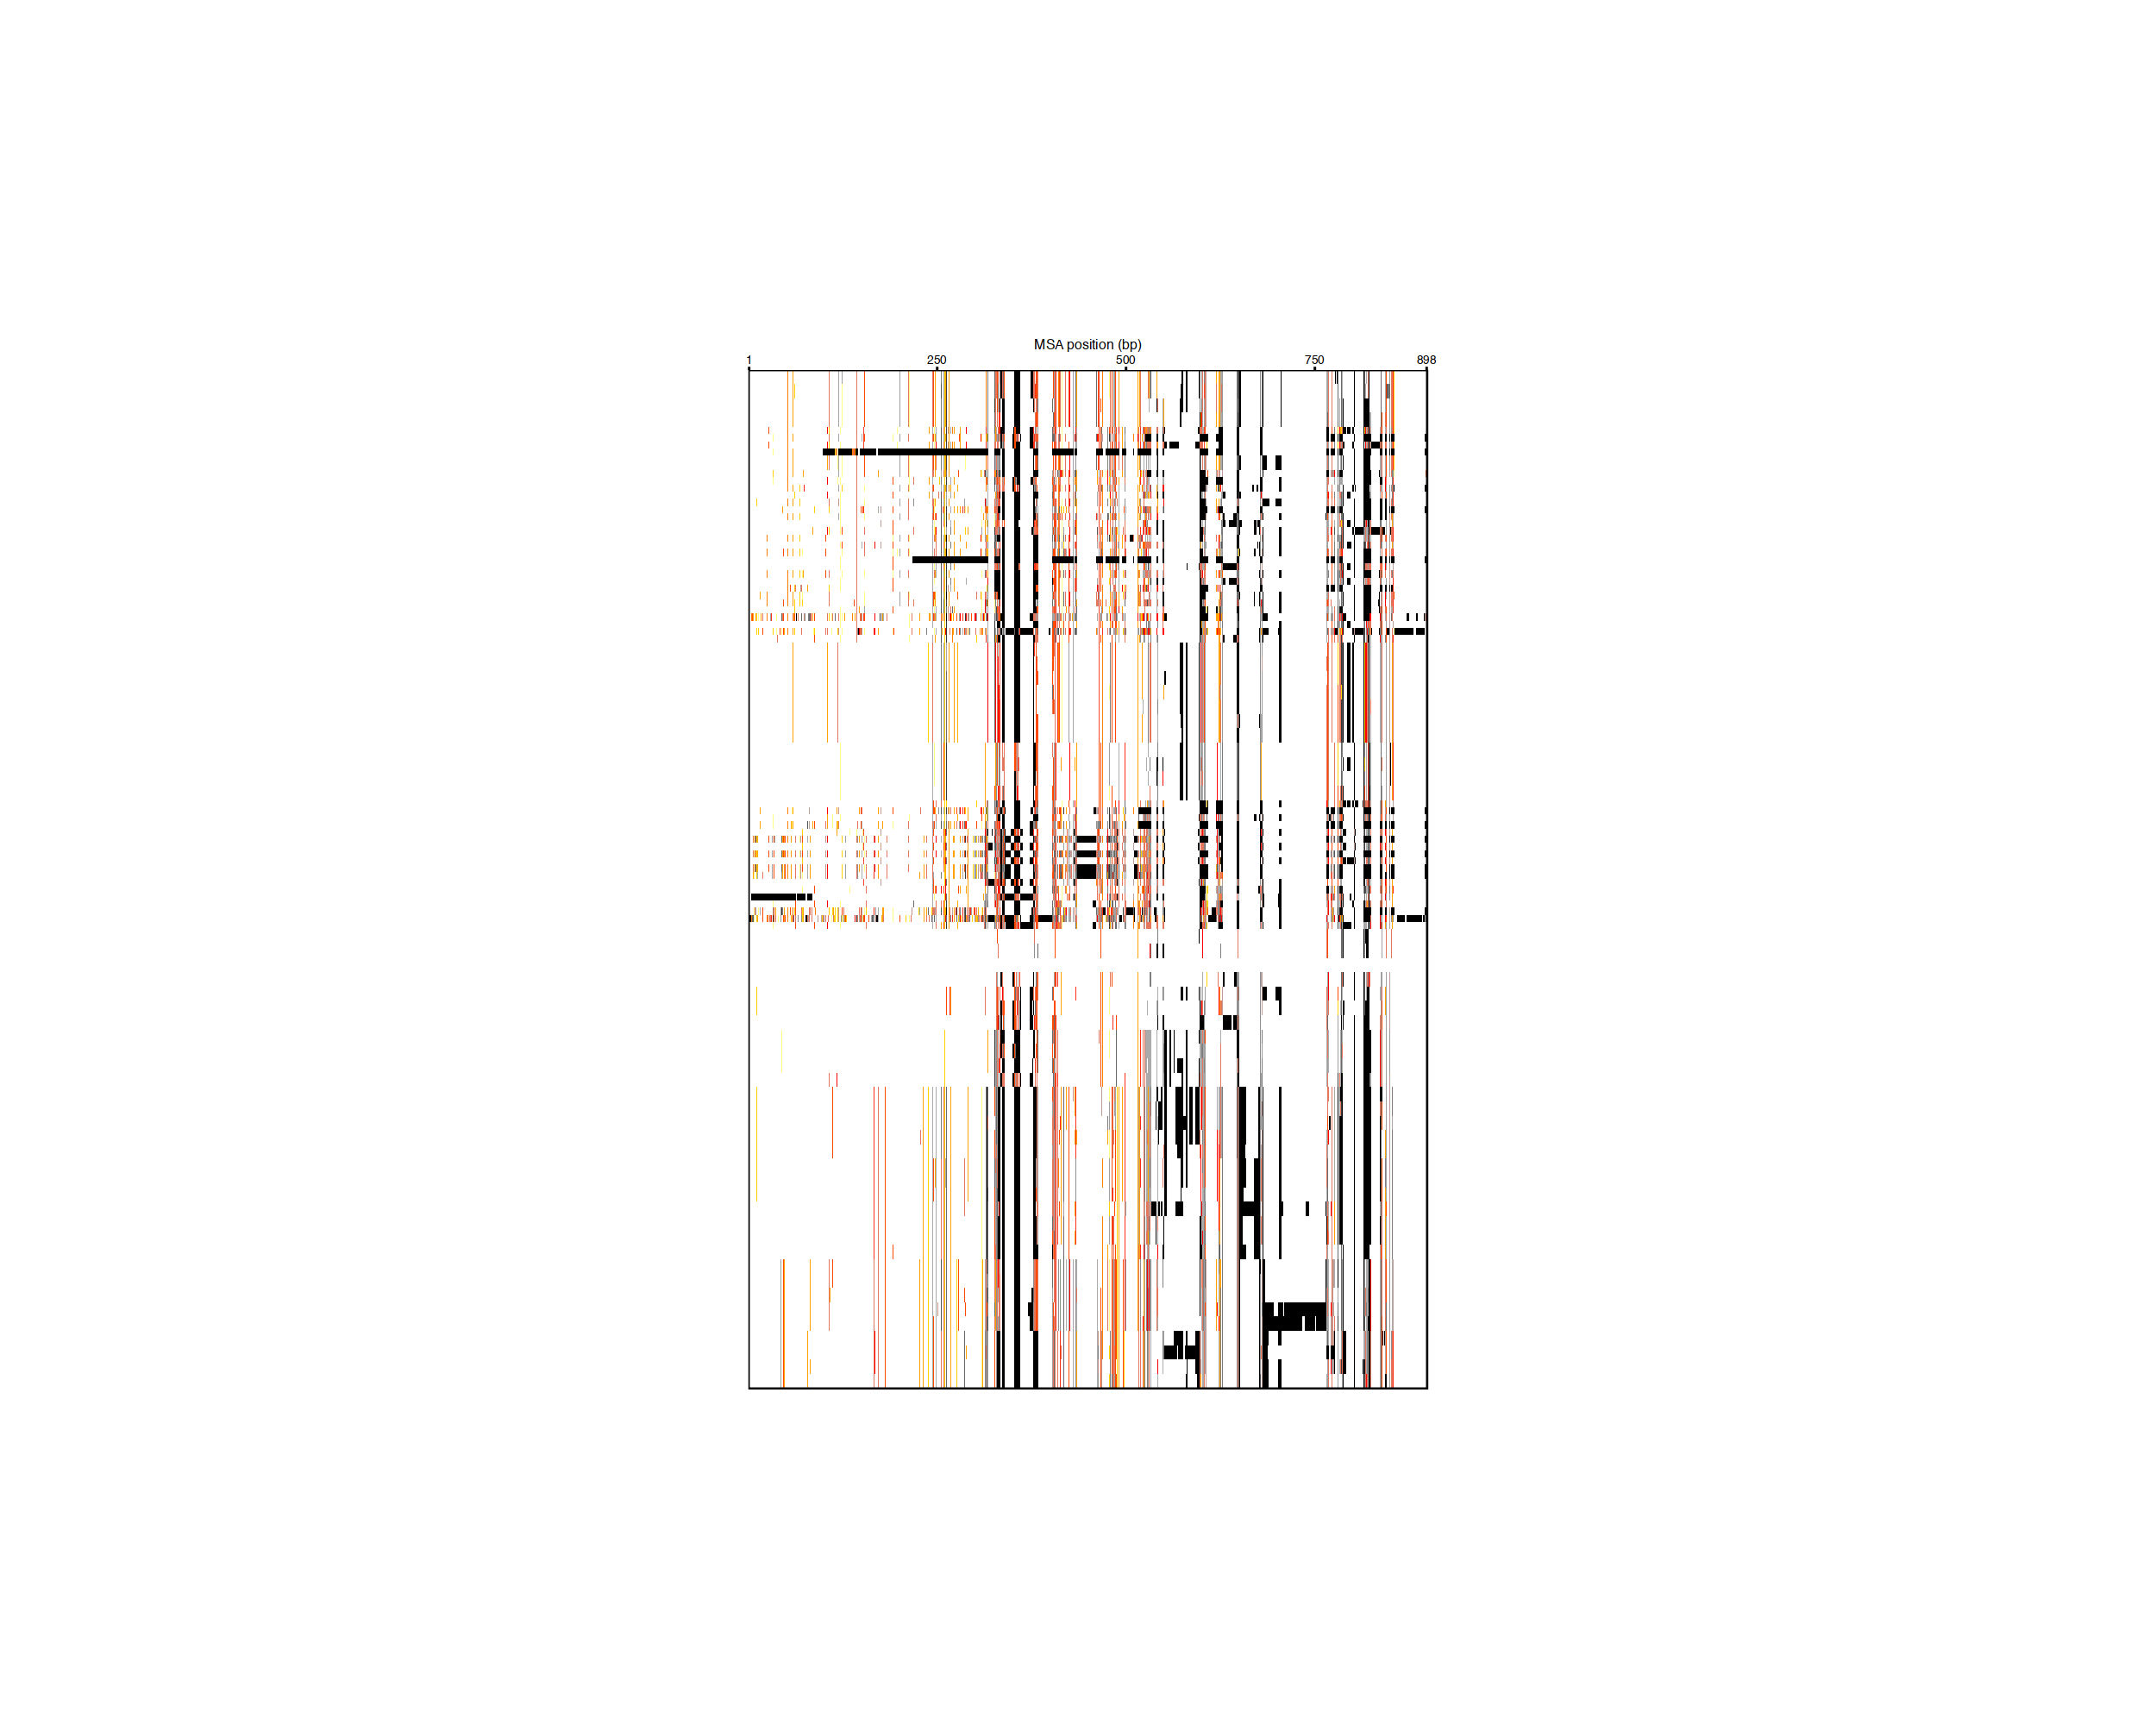

In [127]:
P = ggplot()+
    geom_tile(data=data_l,aes(x=pos,y=ID,fill=value))+
    theme_bw()+ 
    theme(legend.position='none',
          legend.key = element_blank(), 
          strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
          panel.grid.minor = element_blank(),
          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          #aspect.ratio=0.25,
          axis.ticks.y = element_blank(),#element_line(linewidth=0.75,color="#000000"),
          axis.ticks.x = element_line(linewidth=0.75,color="#000000"),
          axis.text.x = element_text(size=9.5,color="#000000"),
          axis.text.y = element_blank(),#element_text(size=9.5,color="#000000"),
         panel.border = element_rect(color="#000000", fill = NA,linewidth=1)
         )+
          scale_x_continuous(expand=c(0,0),limits=c(0,max_pos+1),breaks= c(1,seq(250,750,by=250),max_pos),position="top" ) + 
          scale_y_discrete(expand=c(0,0),limits=rev(levels(data_l$ID))) +
          scale_fill_gradientn(colors=c("#000000","#565656","#ababab","#FF0000","#FFFF00","#FFFFFF"),limits=c(-100,100))+
         xlab("MSA position (bp)")+         ylab("")

p <-set_panel_size(P,width  = unit(20, "cm"),height = unit(30, "cm"))
grid.newpage()
grid.draw(p)
ggsave(plot=p,file="./output/2023-08-06_MSA_normalized_score_Tdel_dup.pdf",height=100,width=30,units = "cm")





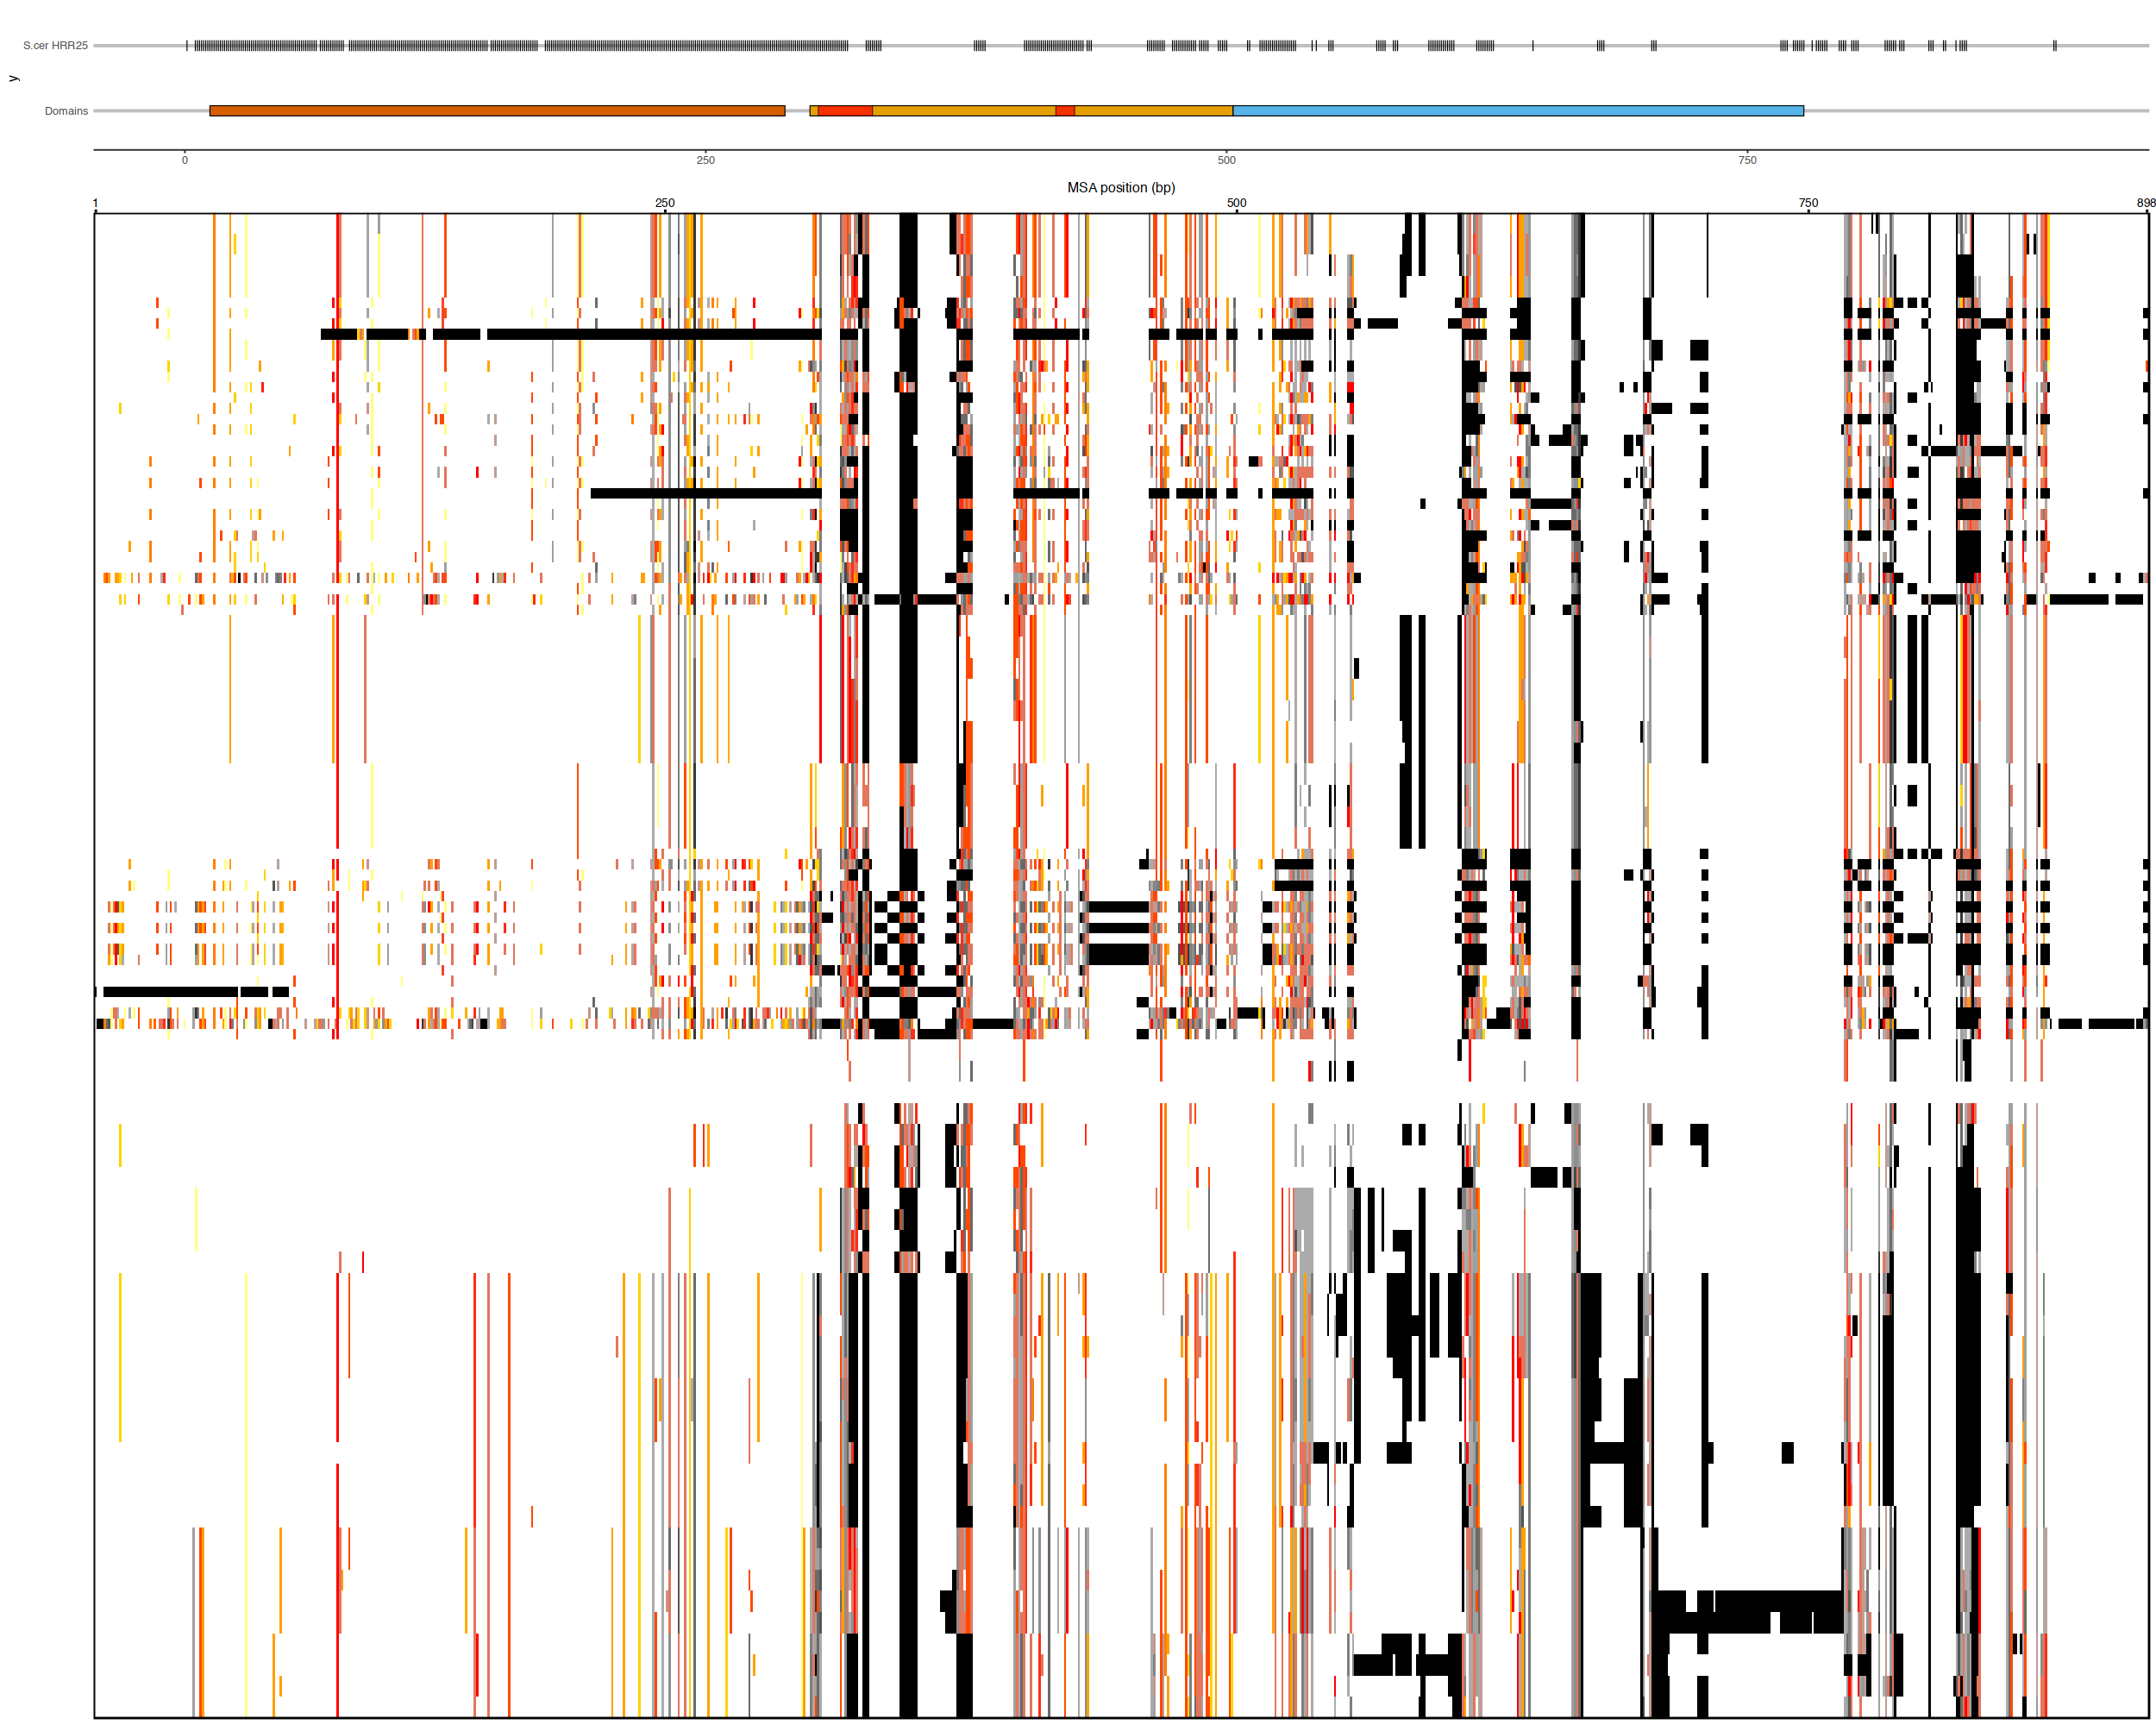

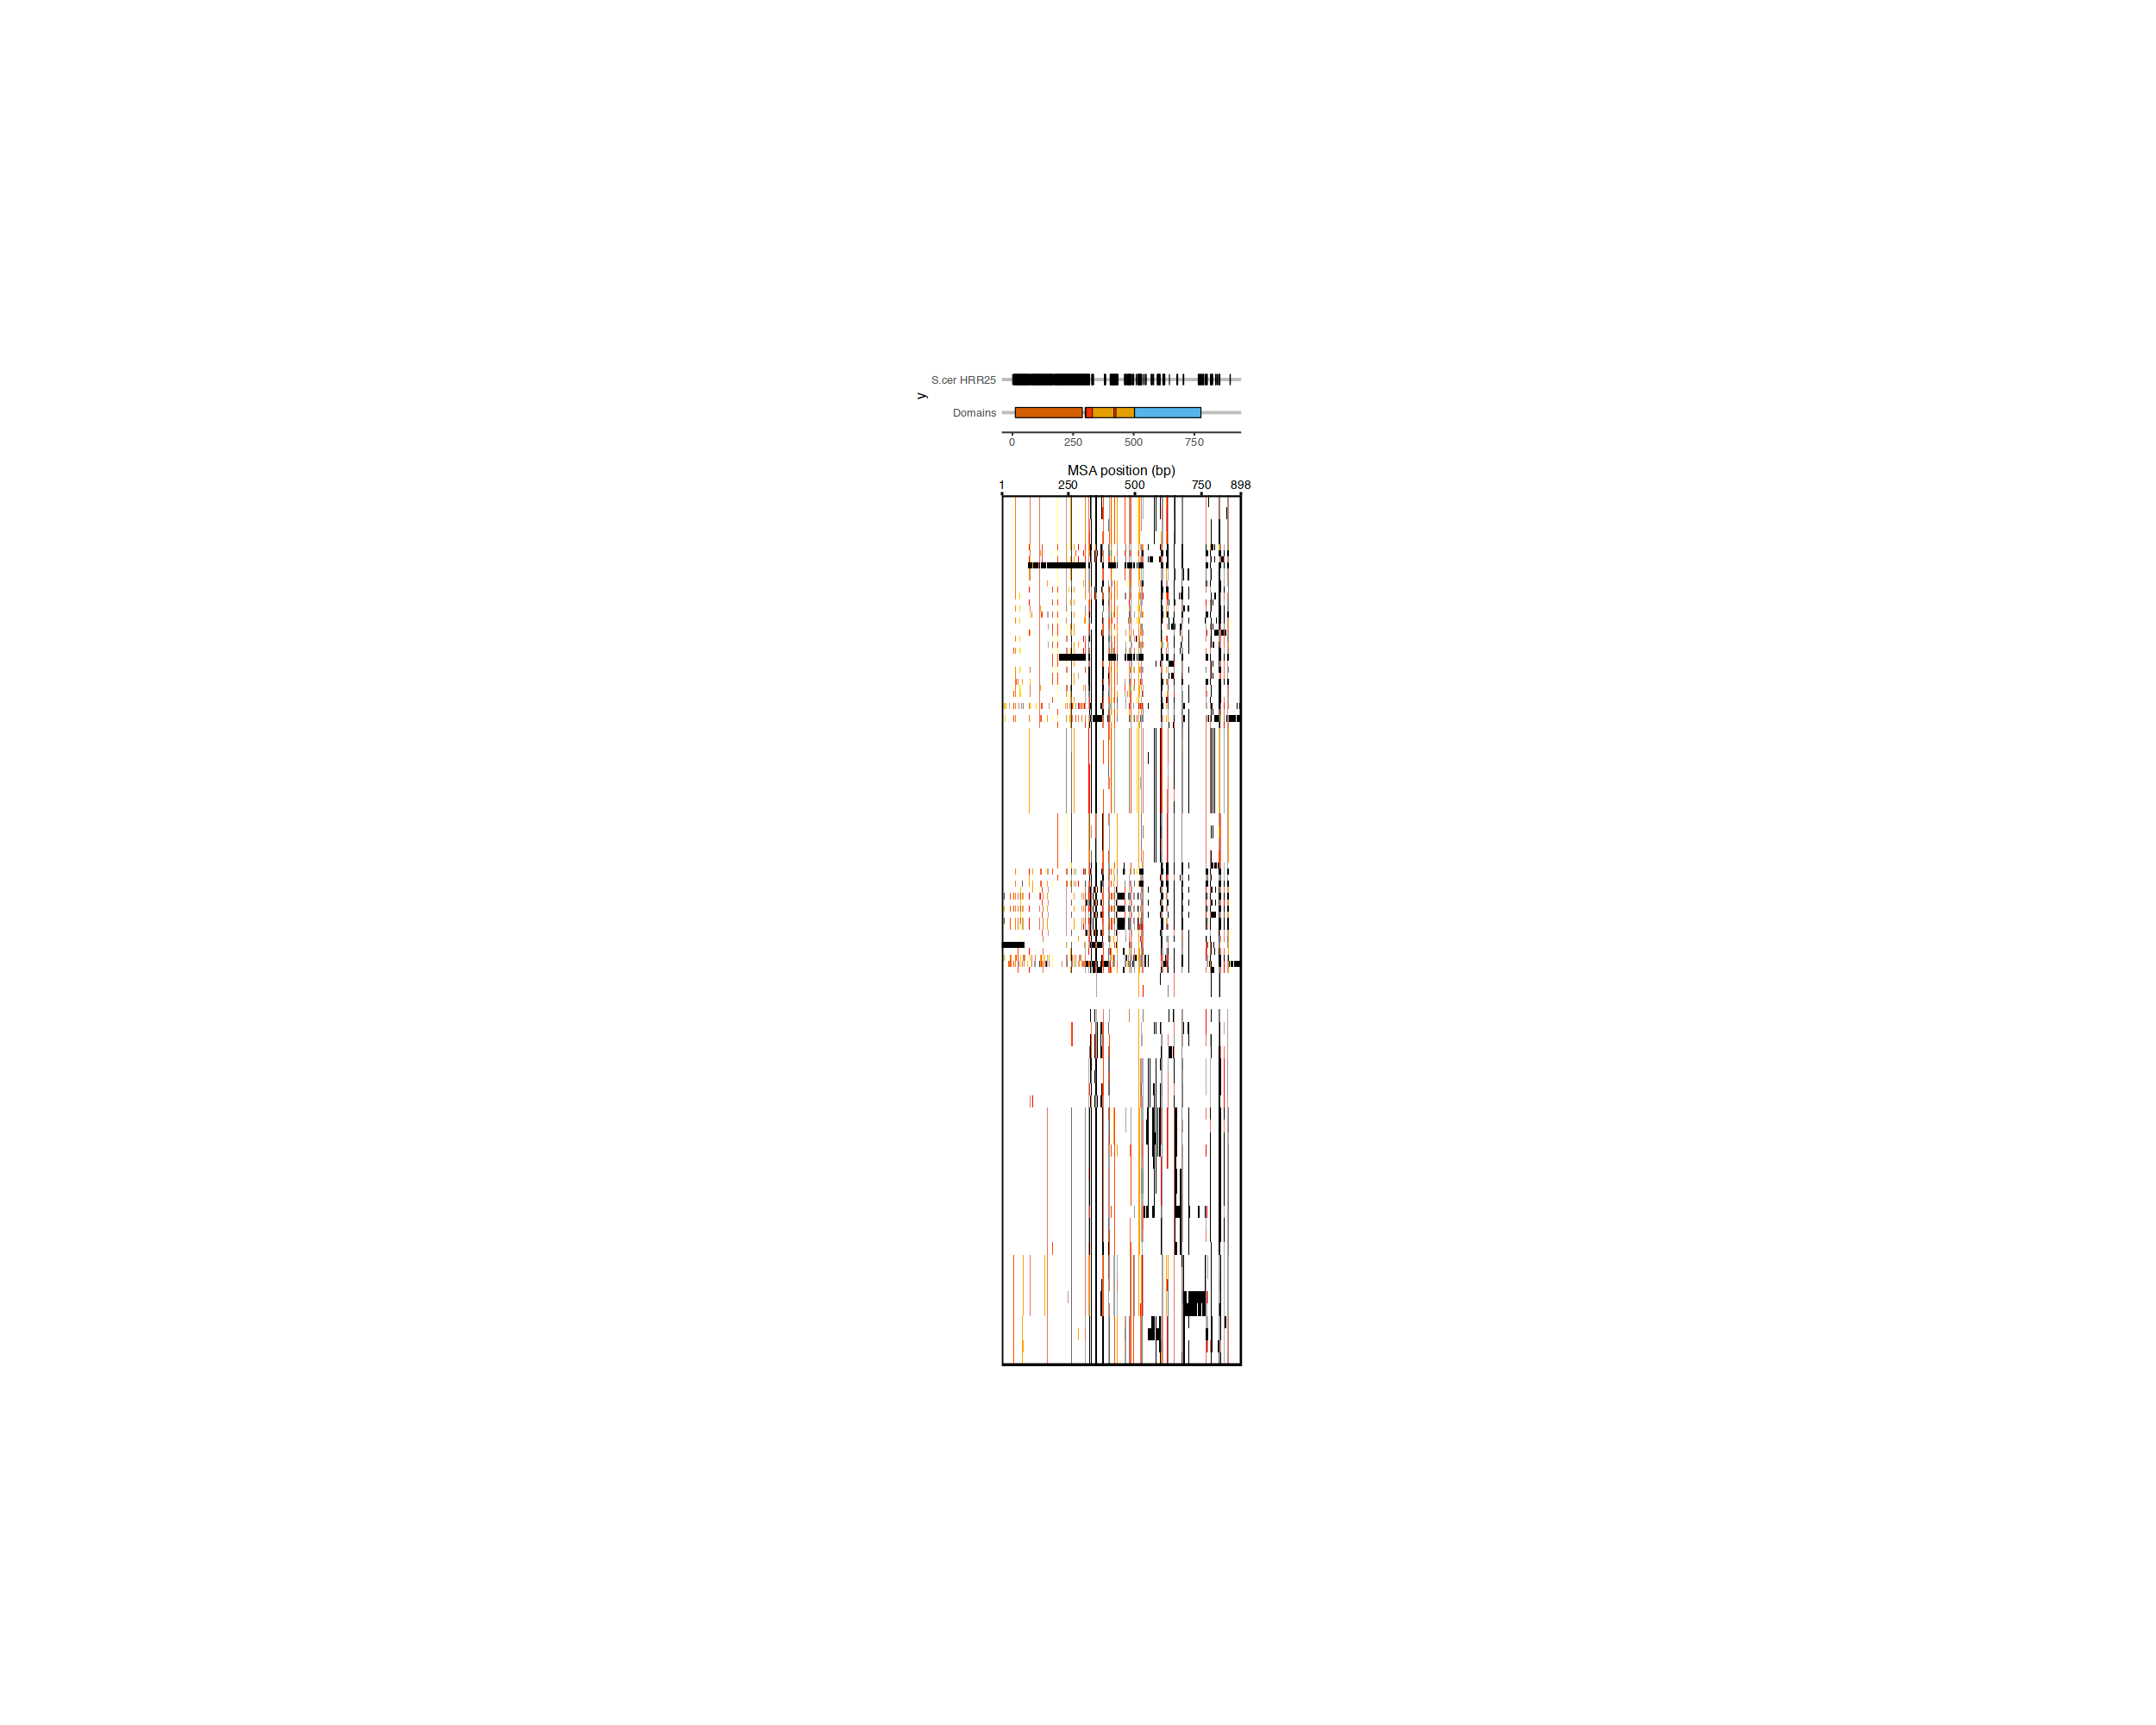

In [128]:
#Arrange them in a grid
gg1 <- ggplot_gtable(ggplot_build(domain_structures+theme(legend.position="none")))
gg2 <- ggplot_gtable(ggplot_build(P))
P_merge = plot_grid(gg1, gg2, align = "v", nrow = 2, rel_heights = c(1/10,9/10),rel_widths=c(1,1))
P_merge

p <-set_panel_size(P_merge,width  = unit(10, "cm"),height = unit(30, "cm"))
grid.newpage()
grid.draw(p)
ggsave(plot=p,file="./output/2023-08-06_MSA_normalized_score_Tdel_dup_merged.pdf",height=50,width=15,units = "cm")
